In [46]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [47]:
#config
device = torch.device('cuda') # or 'cpu'

In [48]:
# Param
num_epochs = 20
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [49]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/', train=True, transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='../../data/', train=False, transform=transforms.ToTensor())

# Data load
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

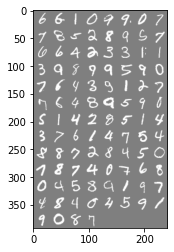

In [50]:

# function to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images from dataset
dataiter = iter(train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))

In [51]:
# CNN(three layer)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(                                                
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(3 * 3 * 64, num_classes)                               

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)                                                    
        out = self.layer3(out)                                                      
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


model = ConvNet(num_classes).to(device)
print (model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=576, out_features=10, bias=True)
)


In [52]:
# Loss and optimize
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [53]:

# Train
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprop and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
           

Epoch [1/20], Step [600/600], Loss: 2.2974
Epoch [2/20], Step [600/600], Loss: 2.2783
Epoch [3/20], Step [600/600], Loss: 2.2656
Epoch [4/20], Step [600/600], Loss: 2.2069
Epoch [5/20], Step [600/600], Loss: 2.1078
Epoch [6/20], Step [600/600], Loss: 1.6264
Epoch [7/20], Step [600/600], Loss: 0.8038
Epoch [8/20], Step [600/600], Loss: 0.6762
Epoch [9/20], Step [600/600], Loss: 0.5288
Epoch [10/20], Step [600/600], Loss: 0.6487
Epoch [11/20], Step [600/600], Loss: 0.2972
Epoch [12/20], Step [600/600], Loss: 0.3051
Epoch [13/20], Step [600/600], Loss: 0.3008
Epoch [14/20], Step [600/600], Loss: 0.3016
Epoch [15/20], Step [600/600], Loss: 0.3491
Epoch [16/20], Step [600/600], Loss: 0.3180
Epoch [17/20], Step [600/600], Loss: 0.2530
Epoch [18/20], Step [600/600], Loss: 0.2331
Epoch [19/20], Step [600/600], Loss: 0.1943
Epoch [20/20], Step [600/600], Loss: 0.1293


In [54]:
# Test the model
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Model Accuracy on the 10000 test images: {} %'.format(100 * correct / total))


Model Accuracy on the 10000 test images: 94.02 %
